# Polynomial Regression

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


### `FuelConsumption.csv`:

- **MODELYEAR** for example: 2014
- **MAKE** for example: Acura
- **MODEL** for example: ILX
- **VEHICLE CLASS** eg: SUV
- **ENGINE SIZE** for example: 4.7
- **CYLINDERS** for example: 6
- **TRANSMISSION** for example: A6
- **FUEL CONSUMPTION in CITY(L/100 km)** for example: 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** eg: 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** eg: 9.2
- **CO2 EMISSIONS (g/km)** for example: 182 --> low --> 0

In [2]:
df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


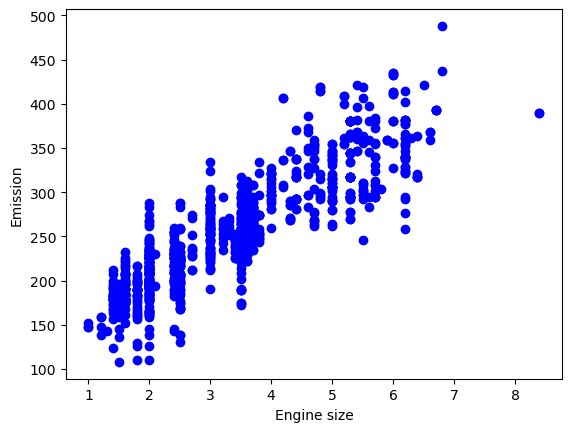

In [4]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="polynomial_regression">Polynominal Regression</h2>


Sometimes the trend of the data is not really linear and looks curved. In this case we can use Polynomial regression method. In fact, there exist many other regressions that can be used to fit any data set, such as quadratic, cubic, ... and possibly to infinity.

In essence, we can call all this polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as a polynomial of order n in x. Let's say you want a polynomial regression (let's make a polynomial of degree 2):

$$ y = b + \theta_1 x + \theta_2 x ^ 2 $$

Now, the question is: how to fit the data in this equation when there are only x values, such as **Engine Size**?
Well, we can create a few additional features: 1, $x$, and $x^2$.

The **PolynomialFeatures()** function in the Scikit-learning library leverages a new feature set from the original feature set. That is, will generate a matrix of all polynomial combinations with features having degree less than or equal to the specified degree. For example, suppose that the initial feature set has only one feature, _ENGINESIZE_. Now, if we choose the degree of the polynomial to be 2, then it will produce 3 features: degree=0, degree=1 and degree=2:

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

**fit_transform** takes x values and outputs a list of data raised from power 0 to power 2 (since we set the degree of the polynomial to 2).

Sample equations and examples are shown below.

$$
\begin{bmatrix}
     v_1\\
     v_2\\
     \vdots\\
     VN
\end{bmatrix}\longrightarrow \begin{bmatrix}
     [ 1 & v_1 & v_1^2]\\
     [ 1 & v_2 & v_2^2]\\
     \vdots & \vdots & \vdots\\
     [ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
     2.\\
     2.4\\
     1.5\\
     \vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
     [ 1 & 2. & 4.]\\
     [ 1 & 2.4 & 5.76]\\
     [ 1 & 1.5 & 2.25]\\
     \vdots & \vdots & \vdots\\
\end{bmatrix}
$$

It looks like feature sets for polynomial linear regression, doesn't it? Correct. Indeed, polynomial regression is a special case of linear regression, with the main idea being how you choose features. Just consider replacing $x$ with $x_1$, $x_1^2$ with $x_2$, ... Then the quadratic equation will be transformed into:

$$y = b + \theta_1 x_1 + \theta_2 x_2$$

Now, we can solve it as with the 'linear regression' problem. Therefore, this polynomial regression is considered as a special case of the traditional multivariable linear regression. So you can use a mechanism similar to linear regression to solve such problems.

So we can use **LinearRegression()** function to solve it:

In [7]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         52.08269817 -1.73248529]]
Intercept:  [104.76800106]


As mentioned before, **Coefficient** and **Intercept coefficient** are parameters of the fit curvy line.
Knowing that this is a typical multivariable linear regression with 3 parameters and knowing that the parameters are the intercept and hyperplane coefficients, sklearn estimated them from the new set of feature sets. . Let's draw it:

Text(0, 0.5, 'Emission')

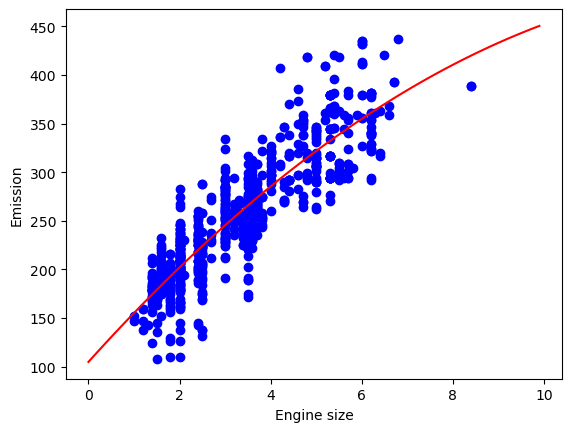

In [8]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="evaluation">Model Evaluation</h2>


In [9]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 25.04
Residual sum of squares (MSE): 1130.22
R2-score: 0.73


Coefficients:  [[ 0.         31.66184973  3.88122017 -0.46379777]]
Intercept:  [126.45042017]
Mean absolute error: 25.00
Residual sum of squares (MSE): 1126.51
R2-score: 0.74


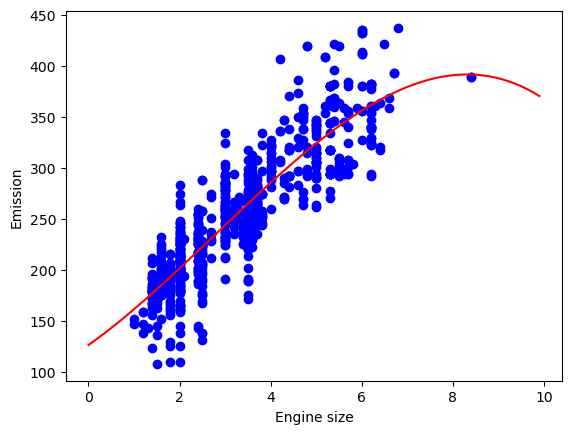

In [11]:
#create model
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y3_ ) )